In [1]:
import sys
sys.path.insert(0, '../../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Union

import candle
import candle.functions as F
import experiments.trainingutils as tutils

## (1) Prepare Data

In [3]:
PRIME = 31
CHAR_BY_ID = {i: chr(256 + 3*i) for i in range(PRIME)}
TRAINING_DATA_FRACTION = 0.4
XRANGE = (0, PRIME)
YRANGE = (1, PRIME)

def binary_operation(x, y):
    inverse = {i: [j for j in range(PRIME) if i*j%PRIME == 1][0] for i in range(1, PRIME)}
    return (x * inverse[y]) % PRIME 

In [4]:
def get_data_as_table(data, ground_truth_data = None, title = None):
    table = pd.DataFrame('',
                         index=sorted([CHAR_BY_ID[i] for i in range(*XRANGE)]),
                         columns=sorted([CHAR_BY_ID[i] for i in range(*YRANGE)]))
    for expr in data:
        result = data[expr]
        if ground_truth_data is not None and expr in ground_truth_data:
            correct_result = ground_truth_data[expr]
            result += (' ✅' if result == correct_result else ' ❌')
        (x, y) = expr[:-1].split('#')
        table.loc[x, y] = result
    if title is not None:
        table.columns.name = title
    return table

full_data = {}
for x in range(*XRANGE):
    for y in range(*YRANGE):
        expr = f'{CHAR_BY_ID[x]}#{CHAR_BY_ID[y]}='
        result = CHAR_BY_ID[binary_operation(x, y)]
        full_data[expr] = result

In [5]:
train_indices = np.random.choice(len(full_data), int(len(full_data) * TRAINING_DATA_FRACTION), replace=False)
train_expr = np.array(list(full_data.keys()))[train_indices].tolist()

train_data = {expr: result for (expr, result) in full_data.items() if expr in train_expr}
test_data = {expr: result for (expr, result) in full_data.items() if expr not in train_expr}

train_table = get_data_as_table(train_data, title='Train')
test_table = get_data_as_table(test_data, title='Test')

## (2) Experiment Summary

> We reproduce OpenAI's Grokking paper, [Grokking: Generalization Beyond Overfitting on Small Algorithmic Datasets, Power et all. 2022](https://arxiv.org/abs/2201.02177).
> 
>  We train a 31x31 modular division table generated by $f(x, y)=x/y \pmod {31}$ that looks like this:

In [6]:
candle.utils.display_sbs(train_table, test_table,
                         margin=60, max_cols=10, max_rows=10)

Train,ă,Ć,ĉ,Č,ď,...,Ŏ,ő,Ŕ,ŗ,Ś
Ā,Ā,,,,,...,Ā,Ā,Ā,,Ā
ă,,İ,,,ŋ,...,,,,,Ś
Ć,,ă,,,Ĺ,...,Ĥ,,,Ś,
ĉ,,,,,,...,,,,,Ŕ
Č,Č,,,,ĕ,...,,Ś,ě,ŗ,
...,...,...,...,...,...,...,...,...,...,...,...
Ŏ,Ŏ,ħ,Ĺ,,,...,ă,ě,Ĥ,,ď
ő,,,ě,Ś,,...,,ă,ł,,
Ŕ,,,,ĕ,,...,,,ă,,ĉ
ŗ,,Ś,,,,...,,İ,ġ,,


## (3) Set up Model and Optimizer

In [7]:
class Config:
    # Optimization configs
    
    ITERATIONS = 15_000
    BATCH_SIZE = min(512, len(train_data) // 2)
    LEARNING_RATE = 1e-3
    WEIGHT_DECAY = 1.0
    ADAM_BETAS = (0.9, 0.98)
    # DASHBOARD_REFRESH_ITERS2 = 10
    
    # LR scheduler configs
    WARMUP_STEPS = 10
    
    # Model architecture configs
    
    NUM_LAYERS = 2
    NUM_HEADS = 4
    EMBED_DIM = 128
    DROPOUT = 0.1
    
config = Config()

In [8]:
class Tokenizer:
    def __init__(self, char_by_id, prime):
        self.char_by_id = char_by_id.copy()
        self.char_by_id[prime] = '#'
        self.char_by_id[prime + 1] = '='
        self.id_by_char = {v: k for (k, v) in self.char_by_id.items()}
        self.id_by_char['-'] = -1
        self.vocab_size = len(self.char_by_id)
    
    def encode(self, text):
        return [self.id_by_char[c] for c in text]
    
    def decode(self, indices):
        return ''.join([self.char_by_id[idx] for idx in indices])  

In [9]:
tokenizer = Tokenizer(CHAR_BY_ID, PRIME)

model = candle.models.gpt.GPT(n_layers=config.NUM_LAYERS,
                              n_heads=config.NUM_HEADS,
                              embed_dim=config.EMBED_DIM,
                              vocab_size=tokenizer.vocab_size,
                              block_size=5,
                              dropout_p=config.DROPOUT)
model.init_weights()

optimizer = candle.optimizer.AdamW(model.parameters(),
                                   learning_rate=config.LEARNING_RATE,
                                   weight_decay=config.WEIGHT_DECAY,
                                   betas=config.ADAM_BETAS)

scheduler = candle.scheduler.WarmupWrapper(candle.scheduler.StepLR(optimizer,
                                                                   step_size=10_000_000,
                                                                   gamma=1.0),  # No StepLR
                                           warmup_steps=config.WARMUP_STEPS)

model.summary(input_shape=(1, 4))

Layer Type # Parameters Output Shape
                                                             
decoder_blocks      0  DecoderBlock       198272  (1, 4, 128)
                    1  DecoderBlock       198272  (1, 4, 128)
dropout                     Dropout            0  (1, 4, 128)
layer_norm                LayerNorm          256  (1, 4, 128)
output_projection         Parameter         4224         None
position_embeddings       Embedding          640     (4, 128)
word_embeddings           Embedding         4224  (1, 4, 128)
Total                                     401664

## (5) Train Model

In [10]:
# Initialize dashboard

writer = candle.Dashboard()
writer.change_settings('figsize', (5, 3.5))
writer.change_settings('xscale', 'log')
writer.change_settings('xscale_logbase', 10)
for label in ['Parameter', 'Gradient', 'Update', 'Adam Variance']:
    writer.change_settings('xlim', (-10, np.inf), chart_label=f'log({label})')
    writer.change_settings('yscale', 'log', chart_label=f'{label} Norm by Layer')

In [11]:
# Initialize DataLoader

X_train = candle.Tensor([tokenizer.encode(expr) for expr in train_data.keys()])
y_train = candle.Tensor([tokenizer.encode(expr)[0] for expr in train_data.values()])
X_test = candle.Tensor([tokenizer.encode(expr) for expr in test_data.keys()])
y_test = candle.Tensor([tokenizer.encode(expr)[0] for expr in test_data.values()])

data_loader = candle.DataLoader(X_train, y_train, batch_size=config.BATCH_SIZE, shuffle=True, drop_last=True)
data_iterator = iter(data_loader)

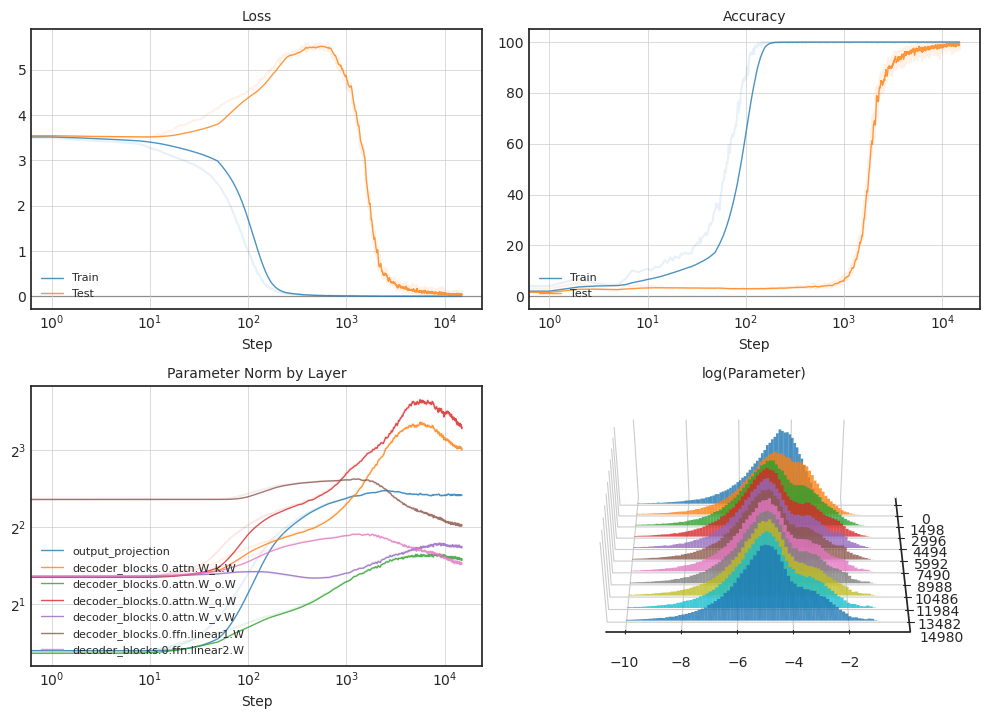

Train Preds,ă,Ć,ĉ,Č,...,ő,Ŕ,ŗ,Ś
Ā,Ā ✅,,,,...,Ā ✅,Ā ✅,,Ā ✅
ă,,İ ✅,,,...,,,,Ś ✅
Ć,,ă ✅,,,...,,,Ś ✅,
ĉ,,,,,...,,,,Ŕ ✅
...,...,...,...,...,...,...,...,...,...
ő,,,ě ✅,Ś ✅,...,ă ✅,ł ✅,,
Ŕ,,,,ĕ ✅,...,,ă ✅,,ĉ ✅
ŗ,,Ś ✅,,,...,İ ✅,ġ ✅,,
Ś,Ś ✅,,,,...,,,,
Test Preds,ă,Ć,ĉ,Č,...,ő,Ŕ,ŗ,Ś


In [13]:
for iteration in range(config.ITERATIONS):
    model.train()
    
    try:
        (X_batch, y_batch) = next(data_iterator)
    except StopIteration:
        data_iterator = iter(data_loader)
        (X_batch, y_batch) = next(data_iterator)
    
    optimizer.zero_grad()
    output = model(X_batch)[:, -1]  # Only compute loss on the last element
    loss = F.cross_entropy_loss(output, y_batch)
    loss.backward()
    
    optimizer.step()
    scheduler.step()
    
    # -----------------
    # Visualize metrics
    # -----------------
    
    with candle.no_grad():
        model.eval()
        
        params_to_track = [
            'output_projection',
            'decoder_blocks.0.attn.W_k.W',
            'decoder_blocks.0.attn.W_o.W',
            'decoder_blocks.0.attn.W_q.W',
            'decoder_blocks.0.attn.W_v.W',
            'decoder_blocks.0.ffn.linear1.W',
            'decoder_blocks.0.ffn.linear2.W',
        ]
        (parameters, param_by_layer, param_norm_by_layer) = tutils.get_parameters(params_to_track, model)
        (gradients, grad_by_layer, grad_norm_by_layer) = tutils.get_gradients(params_to_track, model)
        (updates, upd_by_layer, upd_norm_by_layer) = tutils.get_adam_updates(params_to_track, optimizer)
        (adam_var, adam_var_by_layer, adam_var_norm_by_layer) = tutils.get_adam_var(params_to_track, optimizer)
        (adam_mom, adam_mom_by_layer, adam_mom_norm_by_layer) = tutils.get_adam_mom(params_to_track, optimizer)
        
        corr_grad_mom_by_layer = {
            name: np.corrcoef(grad_by_layer[name].flatten(),
                              adam_mom_by_layer[name].flatten())[0, 1]
            for name in params_to_track
        }
        
        train_output = model(X_train)[:, -1]
        (train_loss, train_acc) = tutils.get_loss_and_accuracy(model, X_train, y_train, train_output.data)
        writer.add_scalars('Loss', {'Train': train_loss})
        writer.add_scalars('Accuracy', {'Train': train_acc})
        
        test_output = model(X_test)[:, -1]
        (test_loss, test_acc) = tutils.get_loss_and_accuracy(model, X_test, y_test, test_output.data)
        writer.add_scalars('Loss', {'Test': test_loss}, iteration)
        writer.add_scalars('Accuracy', {'Test': test_acc}, iteration)
        
        writer.add_scalars('Parameter Norm by Layer', param_norm_by_layer)
        writer.add_histogram('log(Parameter)', np.log(np.abs(parameters) + 1e-10))
        
        # if iteration % config.DASHBOARD_REFRESH_ITERS == 0:
        if (iteration < 500 and iteration % 4 == 0) or (iteration >= 500 and iteration % 20 == 0):
            # Display prediction tables
            train_predictions = model(X_train)[:, -1]
            train_predictions = np.argmax(train_predictions.data, axis=1)
            train_predictions = list(tokenizer.decode(train_predictions))
            train_prediction_data = dict(zip(train_data.keys(), train_predictions))
            train_prediction_table = get_data_as_table(train_prediction_data, train_data, title='Train Preds')
            
            test_predictions = model(X_test)[:, -1]
            test_predictions = np.argmax(test_predictions.data, axis=1)
            test_predictions = list(tokenizer.decode(test_predictions))
            test_prediction_data = dict(zip(test_data.keys(), test_predictions))
            test_prediction_table = get_data_as_table(test_prediction_data, test_data, title='Test Preds')
            
            writer.plot(clear_output=True)
            candle.utils.display_sbs(train_prediction_table, test_prediction_table,
                                     margin=65, max_cols=8, max_rows=8)
        